In [14]:
# install missing packets in jupyter notebook
!pip install cmdstanpy
!pip install arviz
!pip install scipy
!pip install ipywidgets widgetsnbextension pandas-profiling

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [5]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
F = len("Natalia")
L = len("Pluta")

## Excercise 1 -  Generated Quantities Block

In [7]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [8]:
# task 1
samples = gen_quant.sample(data={'M':F}, 
                           fixed_param=True, 
                           iter_sampling=1000, 
                           iter_warmup=0, 
                           chains = 1)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


   lp__  accept_stat__   lambda  y_sim[1]  y_sim[2]  y_sim[3]  y_sim[4]  \
0   0.0            0.0  319.123     329.0     313.0     292.0     319.0   
1   0.0            0.0  172.697     167.0     157.0     187.0     184.0   
2   0.0            0.0  170.152     163.0     164.0     169.0     150.0   
3   0.0            0.0  173.510     177.0     175.0     195.0     182.0   
4   0.0            0.0   59.806      58.0      62.0      51.0      61.0   

   y_sim[5]  y_sim[6]  y_sim[7]  
0     296.0     322.0     297.0  
1     161.0     182.0     190.0  
2     162.0     165.0     159.0  
3     189.0     176.0     176.0  
4      52.0      59.0      56.0  
['lambda', 'y_sim[1]', 'y_sim[2]', 'y_sim[3]', 'y_sim[4]', 'y_sim[5]', 'y_sim[6]', 'y_sim[7]']


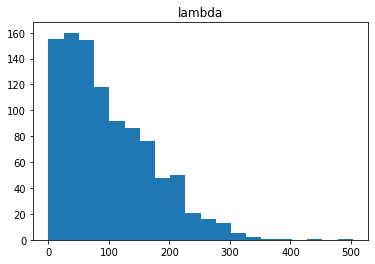

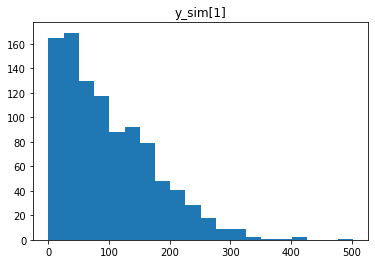

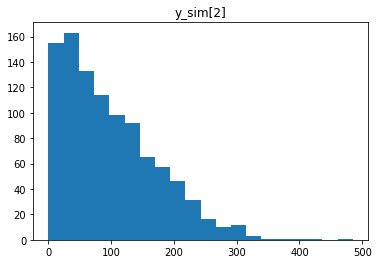

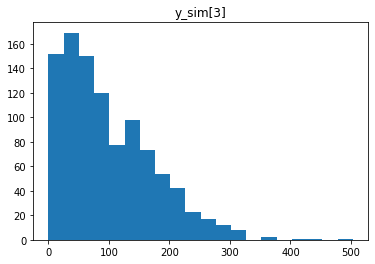

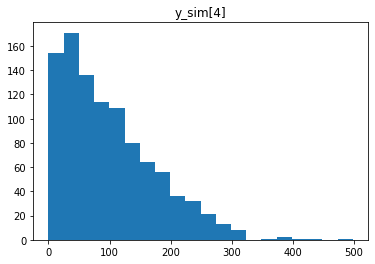

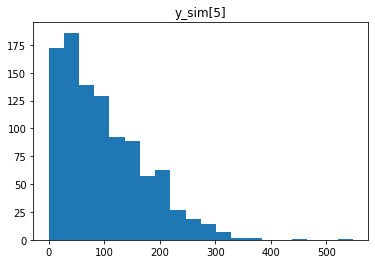

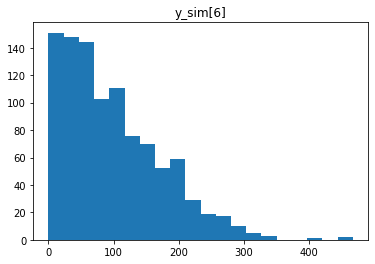

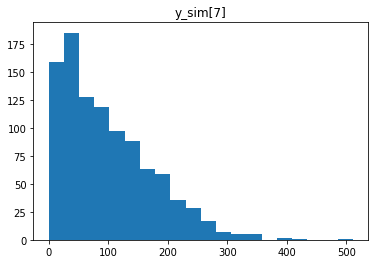

In [17]:
# task 2
df = samples.draws_pd()
print(df.head())

# task 3
# list comprehension generating consecutive strings y_sim[1], y_sim[2], y_sim[3], y_sim[4], y_sim[5], y_sim[6]
columns = ["lambda"]+[f"y_sim[{i}]" for i in range(1, F+1)]
print(columns)

for column in columns:
    plt.hist(df[column], bins=20)
    plt.title(column)
    plt.show()

## Excercise 2 - Constraints on the data 

In [ ]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,2]})

In [ ]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,2]})

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [ ]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


In [ ]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


### Constrained parameter

In [ ]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

In [ ]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [ ]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = # number of letters in the first name
L = # number of letters in the last name
y0 = # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

## Excercise 5 - different methods of defining models


In [ ]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target(data=data,seed=seed)
result_3 = model_log_target_ind(data=data,seed=seed)



In [ ]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [ ]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = )
# investigate the output and plot histogram of mean_y variable